# Aprendizado semi-supervisionado

In [52]:
#carregamento do dataset e separação dos dados de treinamento e teste
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [53]:
#treinamento com Regressão Logística para os 50 primeiros exemplos
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7481108312342569

In [54]:
#treinamento com Regressão Logística para todo o dataset
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

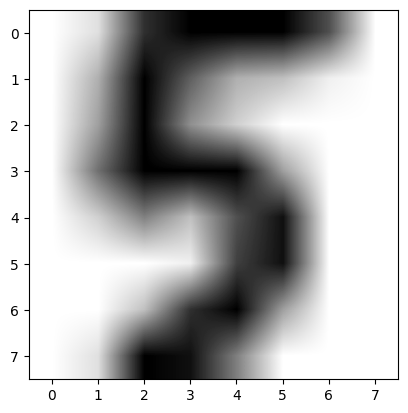

In [55]:
#imprimindo um dígito
import matplotlib.pyplot as plt

plt.imshow(X_train[32].reshape(8,8), cmap='binary', interpolation="bilinear")
plt.show()

In [56]:
#agrupando os objetos com clusterização
from sklearn.cluster import AffinityPropagation

#utilizando o algoritmo AffinityPropagation para obter os centroides
clusterer = AffinityPropagation(damping=0.993, max_iter=1000, random_state=42)
clusterer.fit(X_train)

#retorna os índices dos centroides
representative_digits_idx  = clusterer.cluster_centers_indices_

#dígitos representativos
X_representative_digits  = X_train[representative_digits_idx]

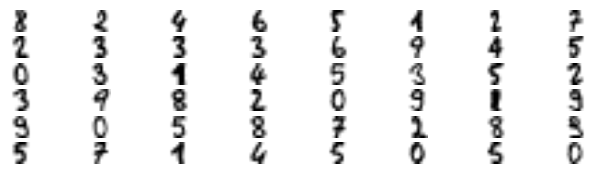

In [57]:
#plota os dígitos representativos
plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(6, 8, index+1)
  plt.imshow(X_representative_digit.reshape(8,8), cmap='binary', interpolation="bilinear")
  plt.axis("off")
plt.show()

In [58]:
#monta o y dos dígitos representativos
import numpy as np

y_representative_digits = np.array([
    8, 2, 4, 6, 5, 1, 2, 7,
    2, 3, 3, 3, 6, 9, 4, 5,
    0, 3, 1, 4, 5, 3, 5, 2,
    3, 9, 8, 2, 0, 9, 1, 9,
    9, 0, 5, 8, 7, 2, 8, 9,
    5, 7, 1, 4, 5, 0, 5, 0
])

In [59]:
#conferência dos valores de y
y_representative_digits == y_train[representative_digits_idx]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [60]:
#treinamento com Regressão Logística para os dígitos representativos
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8564231738035264

**Resultado:** Há uma melhora no resultado em relação à Regressão Logística com os 50 primeiros exemplos cujo score foi de **0.7481**

In [61]:
#exibe o número de clusters detectados
k = len(set(clusterer.labels_))
k

48

In [62]:
#propagação dos rótulos dos exemplos representativos
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[clusterer.labels_ == i] = y_representative_digits[i]

In [63]:
#treinamento com Regressão Logística para todo o dataset com o y propagado
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

**Resultado:** Aqui não há melhora no resultado em relação à Regressão Logística com todo o dataset cujo score anterior foi de **0.9068**
